In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications import vgg16
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available")
else:
    print("GPU is not available")

# Set TensorFlow to use GPU memory dynamically
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

GPU is available


In [ ]:
data_directory='/content/drive/MyDrive/concrete_data_week3'

In [ ]:
data_generator=ImageDataGenerator(rescale=1./255)
image_generator=data_generator.flow_from_directory(data_directory,batch_size=4,class_mode='categorical',seed=24)
first_batch=image_generator.next()[0]
second_batch=image_generator.next()[0]
third_batch=image_generator.next()[0]
fourth_batch=image_generator.next()[0]
fifth_batch=image_generator.next()[0]

Found 15011 images belonging to 2 classes.


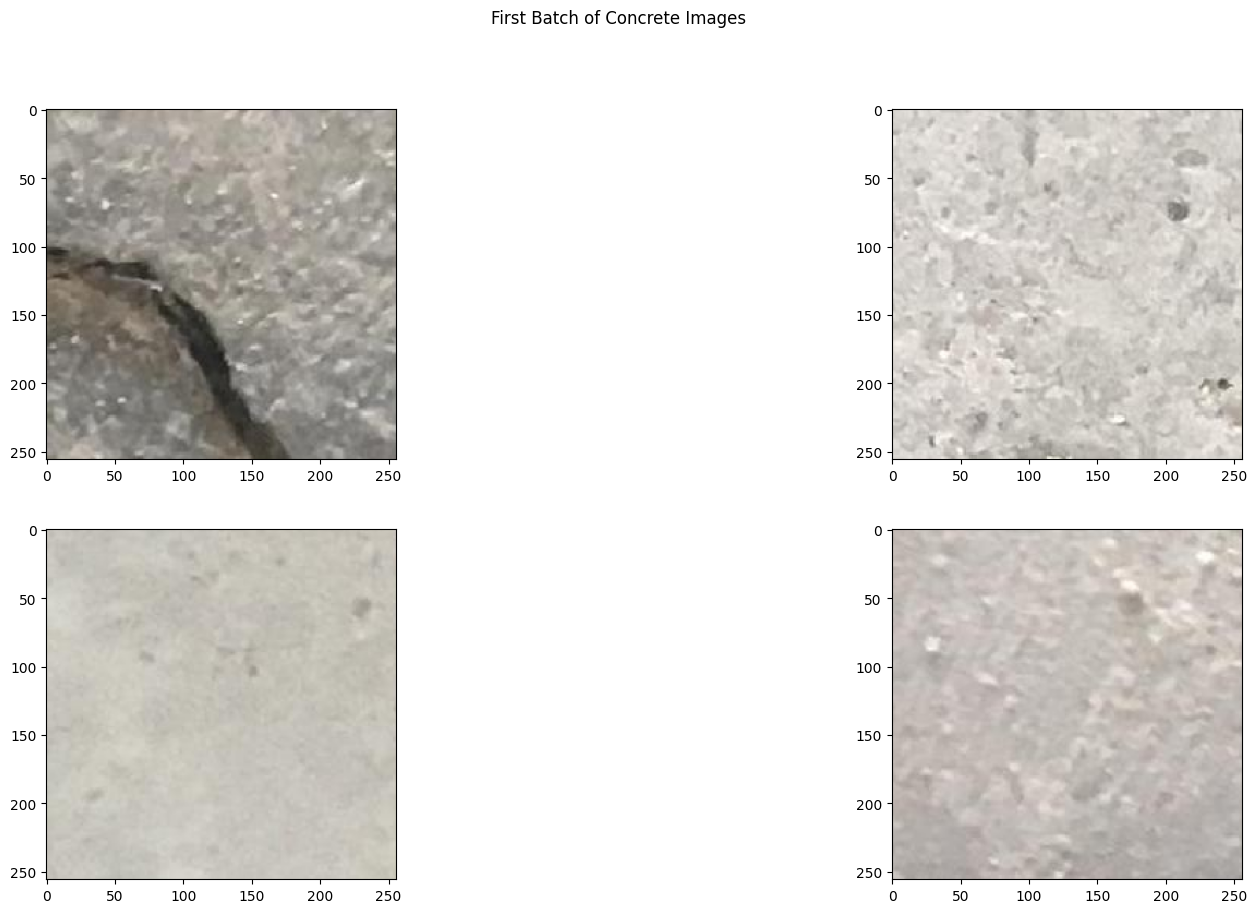

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = first_batch[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images')
plt.show()

In [ ]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100
data_generator = ImageDataGenerator(
   preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/concrete_data_week3/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')


valid_generator=data_generator.flow_from_directory(
    '/content/drive/MyDrive/concrete_data_week3/valid',
    target_size=(image_resize,image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(valid_generator)
num_epochs = 2

Found 10001 images belonging to 2 classes.
Found 5010 images belonging to 2 classes.


In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()

model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
))

model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fit_resnet = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/2
101/101 [==============================] - 3063s 30s/step - loss: 0.0759 - accuracy: 0.9747 - val_loss: 0.0294 - val_accuracy: 0.9898
Epoch 2/2
101/101 [==============================] - 339s 3s/step - loss: 0.0178 - accuracy: 0.9953 - val_loss: 0.0220 - val_accuracy: 0.9938


In [ ]:
model = Sequential()
model.add(vgg16.VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))
model.add(Dense(num_classes, activation='softmax'))
model.layers[0].trainable = False #for not training the vgg part
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fit_history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/2
101/101 [==============================] - 360s 3s/step - loss: 0.3761 - accuracy: 0.8424 - val_loss: 0.1204 - val_accuracy: 0.9703
Epoch 2/2
101/101 [==============================] - 302s 3s/step - loss: 0.0759 - accuracy: 0.9814 - val_loss: 0.0706 - val_accuracy: 0.9786


In [ ]:
from keras.applications import EfficientNetB0

model = Sequential()


model.add(EfficientNetB0(
    include_top=False,
    pooling='avg',
    weights='imagenet',
))

model.add(Dense(num_classes, activation='softmax'))


model.layers[0].trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fit_efficientnet = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/2
101/101 [==============================] - 298s 3s/step - loss: 0.2009 - accuracy: 0.9428 - val_loss: 0.0773 - val_accuracy: 0.9864
Epoch 2/2
101/101 [==============================] - 283s 3s/step - loss: 0.0617 - accuracy: 0.9888 - val_loss: 0.0475 - val_accuracy: 0.9906
